In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_selection import RFE, RFECV, f_regression, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import  KNeighborsClassifier
from datetime import datetime as dt
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.combine import SMOTETomek
from collections import Counter
from mlxtend.feature_selection import ColumnSelector

# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [2]:
#Storing Accuracy

data_accuracy = pd.DataFrame(columns=['Algo', 'Accuracy(KFold)', 'Test', 'Train', 'Recall', 'Precision', 'F1', 'ROC_AUC_SCORE'])
def store(data):
    data_accuracy.loc[len(data_accuracy.index)] = data
    data_accuracy.to_csv('metric_scores.csv')
    print(data_accuracy)



In [3]:
#Appedning data to an existing file
import csv
def append_to_file(data):
    with open('metric_scores.csv', 'a') as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(data)


In [4]:
# Displaying all columns
pd.set_option('display.max_columns', None)

#Display all data in columns
pd.set_option("display.max_colwidth", None)

# np.set_printoptions(threshold=None, edgeitems=None, linewidth=None, suppress=None)
# pd.set_option("display.max_rows", None)
# pd.set_option("display.expand_frame_repr", True)
# pd.set_option('display.width', 1000)


In [28]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [29]:
!pip install contractions
!pip install wordcloud
!pip install autocorrect
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/mist/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
reviews_df = pd.read_csv('IMDB Dataset.csv')

In [31]:
 reviews_df.head(5)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [32]:
reviews_df.shape

(50000, 2)

In [33]:
reviews_df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [34]:
#Label Encoding the sentiment column

In [35]:
le = LabelEncoder()


reviews_df['sentiment'] = le.fit_transform(reviews_df['sentiment'])

In [36]:
reviews_df.head(1)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


In [37]:
reviews_df['review_preprocessed'] = reviews_df['review']

In [38]:
reviews_df

,review,sentiment,review_preprocessed
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary en

In [39]:
# reviews_df.drop(columns='sentiment_preprocessed', axis=1, inplace=True)

In [40]:
#Preprocessing

In [41]:
#Preprocessing 'overview' column

#Lowercasing

reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].str.lower()


# Removing HTML tags

import re

def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].apply(remove_html)
# print(df.head())


#Remove @

def remove_at_the_rate(text):

    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text != "@":
            new.append(word.text)

    return ' '.join(new)

reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].apply(remove_at_the_rate)



#Removing URL

import re

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

reviews_df['review_preprocessed']= reviews_df['review_preprocessed'].apply(remove_url)
# print(df.head())


#Remmove punctuation

import string

punc = string.punctuation

def  remove_punc(text):

    return text.translate(str.maketrans('', '', punc))

reviews_df['review_preprocessed']= reviews_df['review_preprocessed'].apply(remove_punc)



from autocorrect import Speller

check = Speller()

def check_spell(text):

    return check(text)

# train_df['Description_preprocessed'] = train_df['Description_preprocessed'].apply(check_spell)


# Removing stop words


from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def remove_stop_words(text):
    ls = []
    new = []

    ls = nlp(text)

    for word in ls:
        if word.text not in stopwords:

            new.append(word.text)

    return ' '.join(new)

reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].apply(remove_stop_words)


#Removing Contradictions

import contractions

def remove_contradictions(text):

    return " ".join([contractions.fix(word.text) for word in nlp(text)])

reviews_df['review_preprocessed']= reviews_df['review_preprocessed'].apply(remove_contradictions)



def Lemmetization(text):

    return " ".join([word.lemma_ for word in nlp(text)])



reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].apply(Lemmetization)




In [18]:
#Plottings

In [19]:
#Wordclouds

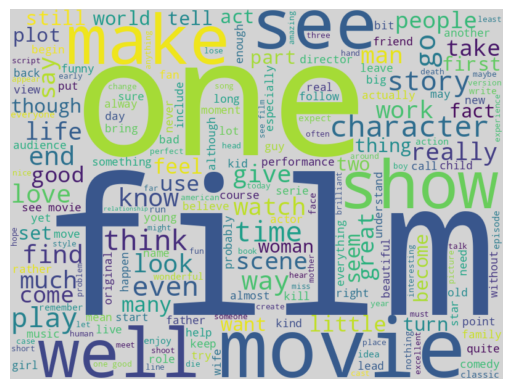

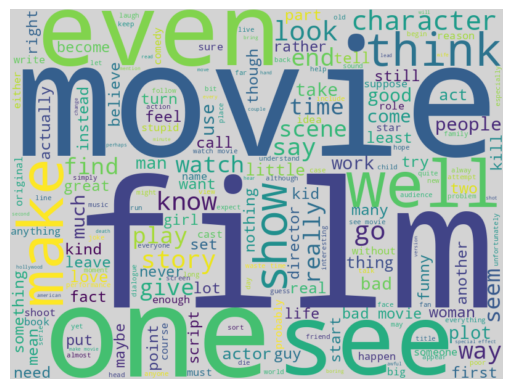

In [20]:
# WordCloud

from wordcloud import WordCloud

wc = WordCloud(background_color='lightgrey', colormap='viridis', width=800, height=600)
wc_pos = wc.generate(reviews_df[reviews_df['sentiment'] == 1]['review_preprocessed'].str.cat(sep=" "))

# make figure to plot
plt.figure()
# plot words
plt.imshow(wc_pos, interpolation="bilinear")
# remove axes
plt.axis("off")
# show the result
plt.show()



wc_neg = wc.generate(reviews_df[reviews_df['sentiment'] == 0]['review_preprocessed'].str.cat(sep=" "))

# make figure to plot
plt.figure()
# plot words
plt.imshow(wc_neg, interpolation="bilinear")
# remove axes
plt.axis("off")
# show the result
plt.show()

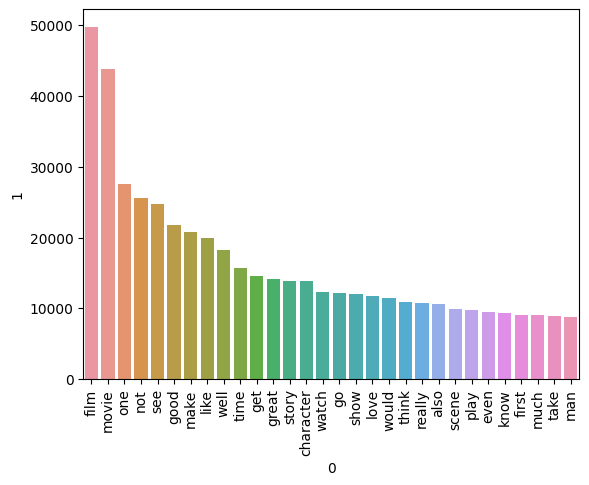

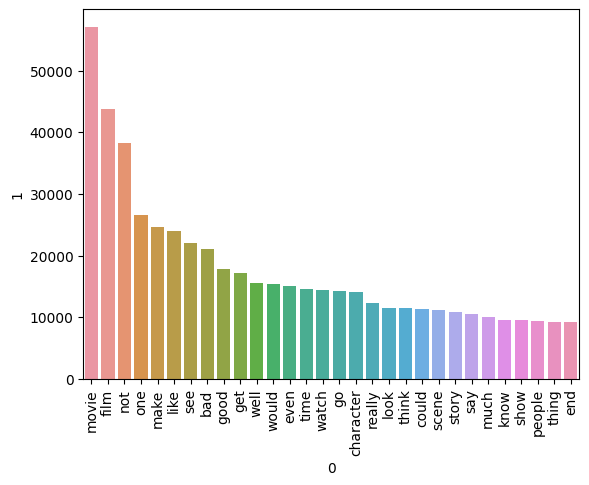

In [21]:
#Creating corpus for plotting word count

pos_corpus = []

for text in reviews_df[reviews_df['sentiment'] == 1]['review_preprocessed'].tolist():
    for word in text.split():
        pos_corpus.append(word)




neg_corpus = []

for text in reviews_df[reviews_df['sentiment'] == 0]['review_preprocessed'].tolist():
    for word in text.split():
        neg_corpus.append(word)


#Bar Plots


sns.barplot(x=pd.DataFrame(Counter(pos_corpus).most_common(30))[0], y=pd.DataFrame(Counter(pos_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(neg_corpus).most_common(30))[0], y=pd.DataFrame(Counter(neg_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
#Remove numbers

def remove_num(sent):
    sent = re.sub('([0-9]+)', '', sent)
    return sent

In [43]:
reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].apply(remove_num)

In [44]:
reviews_df['review_preprocessed_safety'] = reviews_df['review_preprocessed']

In [45]:
reviews_df.head()

,review,sentiment,review_preprocessed,review_preprocessed_safety
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1,one reviewer mention watch oz episode hook right exactly happen methe first thing strike oz brutality unflinche scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy high agenda they city home many aryan muslims gangsta latinos christians italian irish scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show would not dare forget pretty picture paint mainstream audience forget charm forget romance oz not mess around first episode ever see strike nasty surreal could not say ready watch develop taste oz get accustom high level graphic violence violence injustice crooked guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable viewing get touch dark side,one reviewer mention watch oz episode hook right exactly happen methe first thing strike oz brutality unflinche scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy high agenda they city home many aryan muslims gangsta latinos christians italian irish scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show would not dare forget pretty picture paint mainstream audience forget charm forget romance oz not mess around first episode ever see strike nasty surreal could not say ready watch develop taste oz get accustom high level graphic violence violence injustice crooked guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable viewing get touch dark side
1,"A wonderful little

In [46]:
#Word2Vec

In [47]:
!pip install gensim

In [48]:
import gensim

In [49]:
from gensim.utils import simple_preprocess

In [50]:
def making_corpus_each(string):
    corpus = []
    corpus.append(string.split())

    return corpus

In [51]:
string = reviews_df.iloc[0, 2]

In [52]:
making_corpus_each(string)

[['one',
  'reviewer',
  'mention',
  'watch',
  'oz',
  'episode',
  'hook',
  'right',
  'exactly',
  'happen',
  'methe',
  'first',
  'thing',
  'strike',
  'oz',
  'brutality',
  'unflinche',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordit',
  'call',
  'oz',
  'nickname',
  'give',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inward',
  'privacy',
  'high',
  'agenda',
  'they',
  'city',
  'home',
  'many',
  'aryan',
  'muslims',
  'gangsta',
  'latinos',
  'christians',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'far',
  'awayi',
  'would',
  'say',
  'main

In [53]:
reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].apply(making_corpus_each)

In [54]:
corpus = []

In [55]:
def corpus_formation_full(ls):
    corpus.append(ls)

In [56]:
reviews_df.head(5)

,review,sentiment,review_preprocessed,review_preprocessed_safety
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1,"[[one, reviewer, mention, watch, oz, episode, hook, right, exactly, happen, methe, first, thing, strike, oz, brutality, unflinche, scene, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pull, punch, regard, drug, sex, violence, hardcore, classic, use, wordit, call, oz, nickname, give, oswald, maximum, security, state, penitentary, focus, mainly, emerald, city, experimental, section, prison, cell, glass, front, face, inward, privacy, high, agenda, they, city, home, many, aryan, muslims, gangsta, latinos, christians, italian, irish, scuffle, death, stare, dodgy, dealing, shady, agreement, never, far, awayi, would, say, main, appeal, show, due, fact, go, show, would, not, dare, forget, pretty, picture, paint, ...]]",one reviewer mention watch oz episode hook right exactly happen methe first thing strike oz brutality unflinche scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy high agenda they city home many aryan muslims gangsta latinos christians italian irish scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show would not dare forget pretty picture paint mainstream audience forget charm forget romance oz not mess around first episode ever see strike nasty surreal could not say ready watch develop taste oz get accustom high level graphic violence violence injustice crooked guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable viewing get touch dark side
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too!

In [57]:
reviews_df['review_preprocessed'] = reviews_df['review_preprocessed'].apply(corpus_formation_full)

In [58]:
corpus[0]

[['one',
  'reviewer',
  'mention',
  'watch',
  'oz',
  'episode',
  'hook',
  'right',
  'exactly',
  'happen',
  'methe',
  'first',
  'thing',
  'strike',
  'oz',
  'brutality',
  'unflinche',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordit',
  'call',
  'oz',
  'nickname',
  'give',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inward',
  'privacy',
  'high',
  'agenda',
  'they',
  'city',
  'home',
  'many',
  'aryan',
  'muslims',
  'gangsta',
  'latinos',
  'christians',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'far',
  'awayi',
  'would',
  'say',
  'main

In [59]:
from itertools import chain
flatten_corpus = list(chain.from_iterable(corpus))

In [60]:
flatten_corpus[0]

['one',
 'reviewer',
 'mention',
 'watch',
 'oz',
 'episode',
 'hook',
 'right',
 'exactly',
 'happen',
 'methe',
 'first',
 'thing',
 'strike',
 'oz',
 'brutality',
 'unflinche',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'call',
 'oz',
 'nickname',
 'give',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privacy',
 'high',
 'agenda',
 'they',
 'city',
 'home',
 'many',
 'aryan',
 'muslims',
 'gangsta',
 'latinos',
 'christians',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'would',
 'not',
 'dare',
 'fo

In [61]:
model = gensim.models.Word2Vec(window=10, min_count=3, workers=8, vector_size=300, alpha=0.025, sg=1, negative=10)

In [62]:
model.build_vocab(flatten_corpus)

In [63]:
model.train(flatten_corpus, total_examples=model.corpus_count, epochs=10)

(54113253, 59691250)

In [44]:
#Average Word2Vec for each review block

In [45]:
#Building vocabulary
vocabulary = set(model.wv.index_to_key)

In [46]:
final_embeddings = []
for i in flatten_corpus:
    avg_embeddings = None
    for j in i:

        if j in vocabulary:

            if avg_embeddings is None:
                avg_embeddings = model.wv[j]
            else:
                avg_embeddings = avg_embeddings + model.wv[j]
    if avg_embeddings is not None:
        avg_embeddings = avg_embeddings / len(avg_embeddings)
        final_embeddings.append(avg_embeddings)

In [47]:
len(final_embeddings)

50000

In [48]:
final_embeddings[0]

array([ 1.17106894e-02,  2.16407869e-02,  6.71491073e-03,  3.68615799e-02,
       -2.43305489e-02,  4.73008491e-03,  4.55674529e-02,  8.51503909e-02,
        1.65763088e-02, -1.33126751e-02,  1.32214371e-02, -9.64948013e-02,
       -1.71460249e-02,  7.57474303e-02, -6.56545833e-02, -5.36752716e-02,
        1.11096345e-01,  2.06833687e-02,  5.74841397e-04, -8.19510967e-03,
       -1.03119761e-01,  6.50889706e-03, -4.91143577e-03,  4.21202704e-02,
       -1.12715904e-02, -1.99547540e-02, -3.45559083e-02,  3.34179471e-03,
       -5.84099852e-02, -5.44922836e-02,  6.81449100e-02,  2.56494842e-02,
       -3.98836695e-02,  2.84226257e-02, -5.01160920e-02, -2.16871444e-02,
        2.06538606e-02, -6.12411611e-02, -2.28125304e-02, -7.07776460e-04,
       -1.91969436e-03,  4.51324657e-02, -8.41915421e-03, -9.95052531e-02,
        6.92662969e-02,  4.15562615e-02, -5.77728599e-02,  1.41514251e-02,
       -3.47114494e-03,  4.62242821e-03, -3.12831737e-02,  3.89879942e-02,
       -4.07859981e-02,  

In [8]:
y = reviews_df['sentiment']

In [15]:
# type(y.values)
# type(np.array(final_embeddings))
final_embeddings = np.array(final_embeddings)

NameError: name 'final_embeddings' is not defined

In [9]:
from joblib import load, dump

In [10]:
#Loadng the embeddings file

In [11]:
final_embeddings = load('embeddings.joblib') 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(final_embeddings, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(40000, 300)

In [14]:
y_train.shape

(40000,)

In [32]:
#Saving the Word2Vec model

In [33]:
import pickle

In [38]:
pickle.dump(model, open('word2vec_model.pkl', 'wb'))

In [ ]:
#Model Building

In [17]:
#BernoulliNB



pipe_bnb = Pipeline([

    ('bnb', BernoulliNB(binarize=0.0))
])


params_bnb = {

        'bnb__binarize': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}



# gs_bnb = GridSearchCV(pipe_bnb, params_bnb, verbose=10, cv=5, n_jobs=-1, scoring='accuracy')
# gs_bnb.fit(X_train, y_train)


# print('Best accuracy: ', gs_bnb.best_score_, end='\n')
# print('Params: ', gs_bnb.best_params_)



In [18]:
pipe_bnb.fit(X_train, y_train)

Pipeline(steps=[('bnb', BernoulliNB())])

In [19]:
pipe_bnb.fit(X_train, y_train)

y_pred_bnb = pipe_bnb.predict(X_test)
y_pred_train_bnb = pipe_bnb.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_bnb)
train = accuracy_score(y_train, y_pred_train_bnb)
matrix = confusion_matrix(y_test, y_pred_bnb)
report = classification_report(y_test, y_pred_bnb)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_bnb, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_bnb = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_bnb * 100, end='\n')

recall = recall_score(y_test, y_pred_bnb)
precision = precision_score(y_test, y_pred_bnb)
f1 = f1_score(y_test, y_pred_bnb)
score = roc_auc_score(y_test, pipe_bnb.fit(X_train, y_train).predict_proba(X_test)[:, 1])
# data_accuracy = data_accuracy[:-1]

store(['BernoulliNB', acc_bnb, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.7743 Train:  0.7698
Confusion Matrix:  [[3931 1030]
 [1227 3812]]
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.79      0.78      4961
           1       0.79      0.76      0.77      5039

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

Results KFoldCrossValidation:  [0.7685  0.75875 0.786   0.76175 0.77125 0.77675 0.76025 0.757   0.76975
 0.7795 ]

Accuracy KFoldCrossValidation:  76.895
          Algo  Accuracy(KFold)    Test   Train    Recall  Precision  \
0  BernoulliNB          0.76895  0.7743  0.7698  0.756499   0.787278   

         F1  ROC_AUC_SCORE  
0  0.771582       0.851361  


In [20]:
#Model Creation

#GaussianNB

pipe_gnb = Pipeline([

    ('gnb', GaussianNB())
])

In [21]:
pipe_gnb.fit(X_train, y_train)

y_pred_gnb = pipe_gnb.predict(X_test)
y_pred_train_gnb = pipe_gnb.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_gnb)
train = accuracy_score(y_train, y_pred_train_gnb)
matrix = confusion_matrix(y_test, y_pred_gnb)
report = classification_report(y_test, y_pred_gnb)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_gnb, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_gnb = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_gnb * 100, end='\n')

recall = recall_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)
score = roc_auc_score(y_test, pipe_gnb.fit(X_train, y_train).predict_proba(X_test)[:, 1])
store(['GaussianNB', acc_gnb, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.5424 Train:  0.546175
Confusion Matrix:  [[4229  732]
 [3844 1195]]
Classification Report:                precision    recall  f1-score   support

           0       0.52      0.85      0.65      4961
           1       0.62      0.24      0.34      5039

    accuracy                           0.54     10000
   macro avg       0.57      0.54      0.50     10000
weighted avg       0.57      0.54      0.49     10000

Results KFoldCrossValidation:  [0.54725 0.54975 0.55175 0.53825 0.552   0.547   0.5555  0.52575 0.543
 0.553  ]

Accuracy KFoldCrossValidation:  54.63250000000001
          Algo  Accuracy(KFold)    Test     Train    Recall  Precision  \
0  BernoulliNB         0.768950  0.7743  0.769800  0.756499   0.787278   
1   GaussianNB         0.546325  0.5424  0.546175  0.237150   0.620135   

         F1  ROC_AUC_SCORE  
0  0.771582       0.851361  
1  0.343095       0.695632  


In [22]:
  #Model Creation

#LogisticRegression



pipe_lr = Pipeline([
    
    ('lr', LogisticRegression(C=10, penalty='l2', solver='liblinear'))
])

params_lr = {

        'lr__penalty': ['l1', 'l2'],
        'lr__solver': ['liblinear', 'saga'],
        'lr__C': [1.0, 0.1, 0.01, 0.001, 10]
}


# gs_lr = GridSearchCV(pipe_lr, params_lr, verbose=10, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
# gs_lr.fit(X_train, y_train)


# print('Best accuracy: ', gs_lr.best_score_, end='\n')
# print('Params: ', gs_lr.best_params_)



In [23]:
pipe_lr.fit(X_train, y_train)

y_pred_lr = pipe_lr.predict(X_test)
y_pred_train_lr = pipe_lr.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_lr)
train = accuracy_score(y_train, y_pred_train_lr)
matrix = confusion_matrix(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_lr, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_lr = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_lr * 100, end='\n')

recall = recall_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
score = roc_auc_score(y_test, pipe_lr.fit(X_train, y_train).predict_proba(X_test)[:, 1])


store(['LogisticRegression', acc_lr, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.8824 Train:  0.887225
Confusion Matrix:  [[4329  632]
 [ 544 4495]]
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Results KFoldCrossValidation:  [0.8835  0.88475 0.887   0.88475 0.88525 0.8865  0.8805  0.87975 0.8845
 0.88525]

Accuracy KFoldCrossValidation:  88.41749999999999
                 Algo  Accuracy(KFold)    Test     Train    Recall  Precision  \
0         BernoulliNB         0.768950  0.7743  0.769800  0.756499   0.787278   
1          GaussianNB         0.546325  0.5424  0.546175  0.237150   0.620135   
2  LogisticRegression         0.884175  0.8824  0.887225  0.892042   0.876731   

         F1  ROC_AUC_SCORE  
0  0.771582       0.851361  
1  0.343095   

In [24]:
#Model Creation

#KNN

pipe_knn = Pipeline([
   
    ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance'))
])

params_knn = {

        'knn__n_neighbors': [x for x in range(1, 10, 2)],
        'knn__weights': ['uniform', 'distance']
}


# gs_knn = GridSearchCV(pipe_knn, params_knn, verbose=10, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
# gs_knn.fit(X_train, y_train)


# print('Best accuracy: ', gs_knn.best_score_, end='\n')
# print('Params: ', gs_knn.best_params_)



In [25]:
pipe_knn.fit(X_train, y_train)

y_pred_knn = pipe_knn.predict(X_test)
y_pred_train_knn = pipe_knn.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_knn)
train = accuracy_score(y_train, y_pred_train_knn)
matrix = confusion_matrix(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_knn, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_knn = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_knn * 100, end='\n')

recall = recall_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
score = roc_auc_score(y_test, pipe_knn.fit(X_train, y_train).predict_proba(X_test)[:, 1])
# data_accuracy = data_accuracy[:-2]

store(['KNN', acc_knn, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.7983 Train:  1.0
Confusion Matrix:  [[4060  901]
 [1116 3923]]
Classification Report:                precision    recall  f1-score   support

           0       0.78      0.82      0.80      4961
           1       0.81      0.78      0.80      5039

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Results KFoldCrossValidation:  [0.79    0.79375 0.8015  0.8     0.80875 0.8015  0.8005  0.79825 0.79725
 0.8035 ]

Accuracy KFoldCrossValidation:  79.94999999999999
                 Algo  Accuracy(KFold)    Test     Train    Recall  Precision  \
0         BernoulliNB         0.768950  0.7743  0.769800  0.756499   0.787278   
1          GaussianNB         0.546325  0.5424  0.546175  0.237150   0.620135   
2  LogisticRegression         0.884175  0.8824  0.887225  0.892042   0.876731   
3                 KNN         0.799500  0.7983  1.000000  0.778527   0.813226

In [26]:
  #Model Creation

#SVC

pipe_svc = Pipeline([
    ('svc', SVC(C=10, class_weight='balanced', degree=3, gamma=0.1, kernel='linear', probability=True))
])

params_svc = {
        
        'svc__C': [1.0, 0.1, 0.01, 10 ,0.001],
        'svc__kernel': ['poly', 'sigmoid', 'linear', 'rbf'],
        'svc__degree': [1, 2, 3, 4, 5],
        'svc__class_weight': [None, 'balanced'],
        'svc__gamma':[1, 10, 0.1, 100]
}

# gs_svc = HalvingGridSearchCV(pipe_svc, params_svc, verbose=10, n_jobs=-1, scoring='accuracy', refit=False, return_train_score=True)
# gs_svc.fit(X_train, y_train)


# print('Best accuracy: ', gs_svc.best_score_, end='\n')
# print('Params: ', gs_svc.best_params_)



In [27]:
pipe_svc.fit(X_train, y_train)

y_pred_svc = pipe_svc.predict(X_test)
y_pred_train_svc = pipe_svc.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_svc)
train = accuracy_score(y_train, y_pred_train_svc)
matrix = confusion_matrix(y_test, y_pred_svc)
report = classification_report(y_test, y_pred_svc)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_svc, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_svc = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_svc * 100, end='\n')

recall = recall_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
score = roc_auc_score(y_test, pipe_svc.fit(X_train, y_train).predict_proba(X_test)[:, 1])


store(['SVC', acc_svc, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.8827 Train:  0.887875
Confusion Matrix:  [[4312  649]
 [ 524 4515]]
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Results KFoldCrossValidation:  [0.8855  0.88675 0.88625 0.8845  0.88375 0.886   0.878   0.878   0.88375
 0.8845 ]

Accuracy KFoldCrossValidation:  88.36999999999999
                 Algo  Accuracy(KFold)    Test     Train    Recall  Precision  \
0         BernoulliNB         0.768950  0.7743  0.769800  0.756499   0.787278   
1          GaussianNB         0.546325  0.5424  0.546175  0.237150   0.620135   
2  LogisticRegression         0.884175  0.8824  0.887225  0.892042   0.876731   
3                 KNN         0.799500  0.7983  1.000000  0.778527   0.8

In [28]:

#Model Creation

#DecisionTrees

pipe_dt = Pipeline([
  
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=18 ,min_samples_split=0.02810221015483809, min_samples_leaf=0.0036074038389123124, min_impurity_decrease=0.00010246900349203739, splitter='best', class_weight=None))
])

params_dt = {

        "dt__criterion": ["gini", "entropy"],
        "dt__splitter": ["best"],
        "dt__max_depth": [None, 5, 7, 9, 11, 15],
        'dt__class_weight': [None, 'balanced'],
        # "dt__ccp_alpha": ccp_alpha_new,
        "dt__min_samples_split": [0.25, 0.5, 0.75, 2, 4, 8, 16],
        "dt__min_samples_leaf": [15, 20, 0.33, 0.25],
}

# gs_dt = HalvingGridSearchCV(pipe_dt, params_dt, factor=2, verbose=1, n_jobs=-1, scoring='accuracy', refit=False, return_train_score=False)
# gs_dt.fit(X_train, y_train)


# print('Best accuracy: ', gs_dt.best_score_, end='\n')
# print('Params: ', gs_dt.best_params_)BaggingClassifier

In [29]:
pipe_dt.fit(X_train, y_train)

y_pred_dt = pipe_dt.predict(X_test)
y_pred_train_dt = pipe_dt.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_dt)
train = accuracy_score(y_train, y_pred_train_dt)
matrix = confusion_matrix(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_dt, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_dt = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_dt * 100, end='\n')

recall = recall_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
score = roc_auc_score(y_test, pipe_dt.fit(X_train, y_train).predict_proba(X_test)[:, 1])
# data_accuracy = data_accuracy[:-1]
store(['DecisionTreesC', acc_dt, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.717 Train:  0.7386
Confusion Matrix:  [[3547 1414]
 [1416 3623]]
Classification Report:                precision    recall  f1-score   support

           0       0.71      0.71      0.71      4961
           1       0.72      0.72      0.72      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Results KFoldCrossValidation:  [0.71975 0.7075  0.72825 0.72125 0.7305  0.727   0.72575 0.72325 0.72425
 0.73175]

Accuracy KFoldCrossValidation:  72.3925
                 Algo  Accuracy(KFold)    Test     Train    Recall  Precision  \
0         BernoulliNB         0.768950  0.7743  0.769800  0.756499   0.787278   
1          GaussianNB         0.546325  0.5424  0.546175  0.237150   0.620135   
2  LogisticRegression         0.884175  0.8824  0.887225  0.892042   0.876731   
3                 KNN         0.799500  0.7983  1.000000  0.778527   0.813226   
4   

In [ ]:

#Model Creation

#RandomForestClassifier

pipe_rf = Pipeline([

    ('rf', RandomForestClassifier(n_estimators=300, min_samples_split=4, min_samples_leaf=15, max_depth=None, criterion='entropy', class_weight='None', bootstrap=True))
])


params_rf = {

        "rf__criterion": ["gini", "entropy"],
        "rf__n_estimators": [100, 200, 250],
        "rf__max_depth": [None, 5, 10, 13, 15, 17],
        "rf__bootstrap": [True, False],
        "rf__min_samples_split": [0.25, 0.5, 0.75, 2, 4, 8, 16],
        "rf__min_samples_leaf": [15, 20, 0.33, 0.25],
        "rf__class_weight": ['balanced', 'balanced_subsample', None],
}

# Best accuracy:  0.8242798353909466
# Params:  {'rf__bootstrap': True, 'rf__class_weight': None, 'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__min_samples_leaf': 15, 'rf__min_samples_split': 16, 'rf__n_estimators': 200}

# rf_gs = HalvingGridSearchCV(pipe_rf, params_rf, factor=2, verbose=1, n_jobs=-1, scoring='accuracy', refit=False, return_train_score=False)
# rf_gs.fit(X_train, y_train)


# print('Best accuracy: ', rf_gs.best_score_, end='\n')
# print('Params: ', rf_gs.best_params_)

In [ ]:
pipe_rf.fit(X_train, y_train)

y_pred_rf = pipe_rf.predict(X_test)
pred_train_rf = pipe_rf.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_rf)
train = accuracy_score(y_train, pred_train_rf)
matrix = confusion_matrix(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")



In [ ]:

# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_rf, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_rf = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_rf * 100, end='\n')

recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
score = roc_auc_score(y_test, pipe_rf.fit(X_train, y_train).predict_proba(X_test)[:, 1])
store(['RandomForestClassifier', acc_rf, test, train, recall, precision, f1, score])

In [73]:
#Saving the final embeddings daat to pickle file

In [30]:
from joblib import load, dump
# dump(final_embeddings, 'embeddings.joblib')

In [31]:
path = pipe_dt.named_steps['dt'].cost_complexity_pruning_path(X_train, y_train)

ccp_alpha, impurities = path.ccp_alphas, path.impurities
ccp_alpha = ccp_alpha[:-1]


In [32]:
ccp_alpha

array([0.        , 0.0002544 , 0.00027887, 0.00036415, 0.00047201,
       0.00054407, 0.00058143, 0.00065934, 0.00072439, 0.00076278,
       0.00079   , 0.00080219, 0.00083488, 0.00089721, 0.00091017,
       0.00093218, 0.00096944, 0.00104732, 0.00110344, 0.00124912,
       0.00125257, 0.00126615, 0.00128784, 0.00133145, 0.00137264,
       0.00138227, 0.00141776, 0.00146134, 0.00153047, 0.00155998,
       0.00177363, 0.00180422, 0.00185198, 0.00190594, 0.00192647,
       0.0019416 , 0.00220252, 0.00223292, 0.00248141, 0.00253293,
       0.0026793 , 0.00269873, 0.00279384, 0.00302007, 0.0031067 ,
       0.00318617, 0.00403055, 0.00405549, 0.00468515, 0.00523878,
       0.00597652, 0.00766735, 0.00802942, 0.01022166, 0.01509115,
       0.01648597, 0.03190454])

In [33]:

#Model Creation

#RandomForestClassifier

pipe_rf = Pipeline([

    ('rf', RandomForestClassifier(n_estimators=200, ccp_alpha=8.891561344505071e-05, min_samples_split=4, min_samples_leaf=15, max_depth=7, criterion='entropy', bootstrap=True))
])


params_rf = {
        
        'rf__ccp_alpha': ccp_alpha
}


# rf_gs = rf_gs = HalvingGridSearchCV(pipe_rf, params_rf, factor=2, verbose=1, n_jobs=-1, scoring='accuracy', refit=False, return_train_score=False)
# rf_gs.fit(X_train, y_train)


# print('Best accuracy: ', rf_gs.best_score_, end='\n')
# print('Params: ', rf_gs.best_params_)

In [34]:
pipe_rf.fit(X_train, y_train)

y_pred_rf = pipe_rf.predict(X_test)
pred_train_rf = pipe_rf.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_rf)
train = accuracy_score(y_train, pred_train_rf)
matrix = confusion_matrix(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_rf, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_rf = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_rf * 100, end='\n')

recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
score = roc_auc_score(y_test, pipe_rf.fit(X_train, y_train).predict_proba(X_test)[:, 1])
# data_accuracy = data_accuracy[:-1]
store(['RandomForestClassifier', acc_rf, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.8129 Train:  0.836925
Confusion Matrix:  [[3960 1001]
 [ 870 4169]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.80      0.81      4961
           1       0.81      0.83      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Results KFoldCrossValidation:  [0.80725 0.807   0.80875 0.81675 0.815   0.8185  0.80525 0.80475 0.803
 0.81825]

Accuracy KFoldCrossValidation:  81.045
                     Algo  Accuracy(KFold)    Test     Train    Recall  \
0             BernoulliNB         0.768950  0.7743  0.769800  0.756499   
1              GaussianNB         0.546325  0.5424  0.546175  0.237150   
2      LogisticRegression         0.884175  0.8824  0.887225  0.892042   
3                     KNN         0.799500  0.7983  1.000000  0.778527   
4                     SVC         0.883

In [35]:

#Model Creation

#GradientBoostingClassifier

pipe_gb = Pipeline([

    ('gb', GradientBoostingClassifier(criterion='friedman_mse', init=RandomForestClassifier(n_estimators=200, ccp_alpha=8.891561344505071e-05, min_samples_split=4, min_samples_leaf=15, max_depth=7, criterion='entropy', bootstrap=True, n_jobs=-1), learning_rate=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=20, min_samples_split=2, n_estimators=200))
])


params_gb = {

        'gb__init': [None, RandomForestClassifier(n_jobs=-1)],
        'gb__learning_rate': [1, 0.1, 0.01, 0.001, 10],
        'gb__n_estimators': [100, 200],
        'gb__criterion': ['friedman_mse', 'squared_error'],
        "gb__min_samples_split": [0.25, 0.5, 0.75, 2, 4, 8, 16],
        "gb__max_depth": [None, 5, 10, 13, 15, 17], 
        "gb__min_samples_leaf": [15, 20, 0.33, 0.25],
        'gb__min_impurity_decrease': [0.0, 0.1, 0.01, 0.001]
}

# Best accuracy:  0.8558299039780521
# Params:  {'gb__criterion': 'friedman_mse', 'gb__init': RandomForestClassifier(n_jobs=-1), 'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__min_impurity_decrease': 0.001, 'gb__min_samples_leaf': 20, 'gb__min_samples_split': 2, 'gb__n_estimators': 200}

# gb_gs = HalvingGridSearchCV(pipe_gb, params_gb, verbose=1, n_jobs=-1, scoring='accuracy', refit=False, return_train_score=False)
# gb_gs.fit(X_train, y_train)


# print('Best accuracy: ', gb_gs.best_score_, end='\n')
# print('Params: ', gb_gs.best_params_)

In [36]:
pipe_gb.fit(X_train, y_train)

y_pred_gb = pipe_gb.predict(X_test)
pred_train_gb = pipe_gb.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_gb)
train = accuracy_score(y_train, pred_train_gb)
matrix = confusion_matrix(y_test, y_pred_gb)
report = classification_report(y_test, y_pred_gb)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_gb, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_gb = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_gb * 100, end='\n')

recall = recall_score(y_test, y_pred_gb, average='macro')
precision = precision_score(y_test, y_pred_gb, average='macro')
f1 = f1_score(y_test, y_pred_gb, average='macro')
score = roc_auc_score(y_test, pipe_gb.fit(X_train, y_train).predict_proba(X_test)[:, 1])
# data_accuracy=data_accuracy[:-1]
store(['GradientBoostingClassifier', acc_gb, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.857 Train:  0.89135
Confusion Matrix:  [[4210  751]
 [ 679 4360]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Results KFoldCrossValidation:  [0.8555  0.85575 0.864   0.86025 0.85225 0.863   0.85175 0.8525  0.86
 0.85875]

Accuracy KFoldCrossValidation:  85.7375
                         Algo  Accuracy(KFold)    Test     Train    Recall  \
0                 BernoulliNB         0.768950  0.7743  0.769800  0.756499   
1                  GaussianNB         0.546325  0.5424  0.546175  0.237150   
2          LogisticRegression         0.884175  0.8824  0.887225  0.892042   
3                         KNN         0.799500  0.7983  1.000000  0.778527   
4                    

In [ ]:

#Model Creation

#BaggingClassifier



pipe_bg = Pipeline([

    ('bg', BaggingClassifier(LogisticRegression(), n_estimators=119, bootstrap=False, bootstrap_features=True, max_samples=0.17683033167958606))
])

    # ('bg', BaggingClassifier(estimator=RandomForestClassifier(n_estimators=200, ccp_alpha=8.891561344505071e-05, min_samples_split=4, min_samples_leaf=15, max_depth=7, criterion='entropy', bootstrap=True ,n_jobs=-1), n_estimators=119, bootstrap=False, bootstrap_features=True, max_samples=0.17683033167958606))

# Trial 6 finished with value: 0.8229749999999999 and parameters: {'n_estimators': 119, 'bootstrap': False, 'bootstrap_features': True, 'max_samples': 0.17683033167958606}. Best is trial 6 with value: 0.8229749999999999.

params_bg = {
        'bg__estimator': [RandomForestClassifier(n_jobs=-1), None],
        'bg__bootstrap': [True, False],
        'bg__bootstrap_features': [True, False],
        'bg__oob_score': [True, False],
        'bg__n_estimators': [150, 200, 250]
}



# bg_gs = HalvingGridSearchCV(pipe_bg, params_bg, factor=2, verbose=1, n_jobs=-1, scoring='accuracy', refit=False, return_train_score=False)
# bg_gs.fit(X_train, y_train)


# print('Best accuracy: ', bg_gs.best_score_, end='\n')
# print('Params: ', bg_gs.best_params_)

In [36]:
pipe_bg.fit(X_train, y_train)

y_pred_bg = pipe_bg.predict(X_test)
pred_train_bg = pipe_bg.predict(X_train)

#Accuracy

test = accuracy_score(y_test, y_pred_bg)
train = accuracy_score(y_train, pred_train_bg)
matrix = confusion_matrix(y_test, y_pred_bg)
report = classification_report(y_test, y_pred_bg)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_bg, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_bg = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_bg * 100, end='\n')

recall = recall_score(y_test, y_pred_bg, average='macro')
precision = precision_score(y_test, y_pred_bg, average='macro')
f1 = f1_score(y_test, y_pred_bg, average='macro')
score = roc_auc_score(y_test, pipe_bg.fit(X_train, y_train).predict_proba(X_test)[:, 1])
# data_accuracy=data_accuracy[:-1]
# store(['BaggingClassifier', acc_bg, test, train, recall, precision, f1, score])
append_to_file(['BaggingClassifier', acc_bg, test, train, recall, precision, f1, score])

Accuracy:  Test:  0.8531 Train:  0.854475
Confusion Matrix:  [[4195  766]
 [ 703 4336]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Results KFoldCrossValidation:  [0.85625 0.85075 0.852   0.85675 0.85375 0.86125 0.85225 0.84325 0.85075
 0.85675]

Accuracy KFoldCrossValidation:  85.3375


In [1]:
#Using optuna

In [75]:
!pip install optuna

In [27]:
import optuna


def objective(trial):
    

    n_estimators = trial.suggest_int('n_estimators', 10, 250)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    # estimator = trial.suggest_categorical('estimator', [None, RandomForestClassifier(max_depth=1)])
    bootstrap_features = trial.suggest_categorical('bootstrap_features', [True, False])
    max_samples = trial.suggest_float('max_samples', 0, 1)

    clf = BaggingClassifier(estimator=None, n_estimators=n_estimators, bootstrap=bootstrap, bootstrap_features=bootstrap_features, max_samples=max_samples)
  
    return cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=80, n_jobs=-1)

# Trial 0 finished with value: 0.8117750000000001 and parameters: {'n_estimators': 152, 'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.8826723962483994}. Best is trial 7 with value: 0.8174250000000001.
trial = study.best_trial

print('Accuracy: ', trial.value)
print('Best params: ', trial.params)

[I 2023-08-14 14:41:26,073] A new study created in memory with name: no-name-5ec9c88a-b6b4-4bff-b3ba-522565ad33b9
[I 2023-08-14 14:42:15,608] Trial 1 finished with value: 0.802475 and parameters: {'n_estimators': 113, 'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.02440574763146408}. Best is trial 1 with value: 0.802475.
[I 2023-08-14 15:35:45,487] Trial 7 finished with value: 0.8174250000000001 and parameters: {'n_estimators': 215, 'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.24644512838196453}. Best is trial 7 with value: 0.8174250000000001.
[I 2023-08-14 16:09:44,651] Trial 0 finished with value: 0.8117750000000001 and parameters: {'n_estimators': 152, 'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.8826723962483994}. Best is trial 7 with value: 0.8174250000000001.
[I 2023-08-14 16:39:51,940] Trial 5 finished with value: 0.8156000000000001 and parameters: {'n_estimators': 90, 'bootstrap': True, 'bootstrap_features': False, 'm

KeyboardInterrupt: 

In [78]:
import optuna


def objective(trial):
    
    # learning_rate = trial.suggest_float('learning_rate', 0, 1)
    # n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50),
    # bootstrap = trial.suggest_categorical('bootstrap', [True, False]),
    # bootstrap_features = trial.suggest_categorical('bootstrap_features', [True, False]),
    # oob_score = trial.suggest_categorical('oob_score', [True, False])
    # max_samples = trial.suggest_float('max_samples', 0, 1)
    
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    min_samples_split = trial.suggest_float('min_samples_split', 0, 1)
    max_depth = trial.suggest_int('max_depth', 3, 20, step=3)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0, 1)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0, 0.1)
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    clf = DecisionTreeClassifier(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_impurity_decrease=min_impurity_decrease, class_weight=class_weight)

    return cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=300, n_jobs=-1)

trial = study.best_trial

print('Accuracy: ', trial.value)
print('Best params: ', trial.params)

[I 2023-08-14 00:32:09,420] A new study created in memory with name: no-name-fb03e607-212f-4014-a02b-00e247c8bdb0
[I 2023-08-14 00:32:09,848] Trial 1 finished with value: 0.5009750000000001 and parameters: {'criterion': 'gini', 'min_samples_split': 0.5576604634845757, 'max_depth': 18, 'min_samples_leaf': 0.8886352524441649, 'min_impurity_decrease': 0.06253297394120769, 'splitter': 'best', 'class_weight': None}. Best is trial 1 with value: 0.5009750000000001.
[I 2023-08-14 00:32:12,970] Trial 3 finished with value: 0.500625 and parameters: {'criterion': 'entropy', 'min_samples_split': 0.9651442674540115, 'max_depth': 3, 'min_samples_leaf': 0.6125902158878457, 'min_impurity_decrease': 0.08698540562145399, 'splitter': 'best', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.5009750000000001.
[I 2023-08-14 00:32:13,444] Trial 4 finished with value: 0.5412999999999999 and parameters: {'criterion': 'entropy', 'min_samples_split': 0.3175505397569278, 'max_depth': 3, 'min_samples_lea

Accuracy:  0.724325
Best params:  {'criterion': 'entropy', 'min_samples_split': 0.02810221015483809, 'max_depth': 18, 'min_samples_leaf': 0.0036074038389123124, 'min_impurity_decrease': 0.00010246900349203739, 'splitter': 'best', 'class_weight': None}


In [ ]:
#Do hyperparameter tuning of the decision trees and pruuning?

In [26]:
#Using hyperopt

In [27]:
!pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 14.8 MB/s eta 0:00:00m eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 5.0 MB/s eta 0:00:001m102.2 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492025 sha256=3e9c4e57f43f8c5b474224df4492e2384aa8f0068f084e6aeaf50c6824041337
  Stored in directory: /home/mist/.cache/pip/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built future


In [ ]:
data_accuracy.to_csv('metric_scores.csv')

In [43]:
metric_scores_df = pd.read_csv('metric_scores .csv')

In [45]:
metric_scores_df.drop(columns='Unnamed: 0', axis=1)

,Algo,Accuracy(KFold),Test,Train,Recall,Precision,F1,ROC_AUC_SCORE
0,BernoulliNB,0.768950,0.7743,0.769800,0.756499,0.787278,0.771582,0.851361
1,GaussianNB,0.546325,0.5424,0.546175,0.237150,0.620135,0.343095,0.695632
2,LogisticRegression,0.884175,0.8824,0.887225,0.892042,0.876731,0.884320,0.946023
3,KNN,0.799500,0.7983,1.000000,0.778527,0.813226,0.795498,0.860979
4,SVC,0.883700,0.8827,0.887875,0.896011,0.874322,0.885034,0.946167
5,DecisionTreesC,0.723925,0.7170,0.738600,0.718992,0.719277,0.719135,0.793518
6,RandomForestClassifier,0.810450,0.8129,0.836925,0.827347,0.806383,0.816730,0.892341
7,GradientBoostingClassifier,0.857375,0.8570,0.891350,0.856935,0.857089,0.856968,0.933536
8,BaggingClassifier,0.853375,0.8531,0.854475,0.853042,0.853167,0.853071,0.921008


In [51]:
metric_scores_df.sort_values(['Accuracy(KFold)', 'F1'], ascending=False)

,Unnamed: 0,Algo,Accuracy(KFold),Test,Train,Recall,Precision,F1,ROC_AUC_SCORE
2,2,LogisticRegression,0.884175,0.8824,0.887225,0.892042,0.876731,0.884320,0.946023
4,4,SVC,0.883700,0.8827,0.887875,0.896011,0.874322,0.885034,0.946167
7,7,GradientBoostingClassifier,0.857375,0.8570,0.891350,0.856935,0.857089,0.856968,0.933536
8,8,BaggingClassifier,0.853375,0.8531,0.854475,0.853042,0.853167,0.853071,0.921008
6,6,RandomForestClassifier,0.810450,0.8129,0.836925,0.827347,0.806383,0.816730,0.892341
3,3,KNN,0.799500,0.7983,1.000000,0.778527,0.813226,0.795498,0.860979
0,0,BernoulliNB,0.768950,0.7743,0.769800,0.756499,0.787278,0.771582,0.851361
5,5,DecisionTreesC,0.723925,0.7170,0.738600,0.718992,0.719277,0.719135,0.793518
1,1,GaussianNB,0.546325,0.5424,0.546175,0.237150,0.620135,0.343095,0.695632


In [ ]:
#Voting Classifier

In [16]:

#Model Creation

#VotingClassifier

pipe_vc = Pipeline([
    
    ('vc', VotingClassifier(
voting='soft',estimators=[("lr", LogisticRegression(C=10, penalty='l2', solver='liblinear')), ('SVC', SVC(C=10, class_weight='balanced', degree=3, gamma=0.1, kernel='linear', probability=True)), ('gb', GradientBoostingClassifier(criterion='friedman_mse', init=RandomForestClassifier(n_estimators=200, ccp_alpha=8.891561344505071e-05, min_samples_split=4, min_samples_leaf=15, max_depth=7, criterion='entropy', bootstrap=True, n_jobs=-1), learning_rate=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=20, min_samples_split=2, n_estimators=200))]))
])

params_vc = {

        'vc__voting': ['soft', 'hard']
}



# vc_gs = HalvingGridSearchCV(pipe_vc, params_vc, verbose=1, factor=2, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')
# vc_gs.fit(X_train, y_train)


# print('Best accuracy: ', vc_gs.best_score_, end='\n')
# print('Params: ', vc_gs.best_params_)



In [18]:
pipe_vc.fit(X_train, y_train)

y_pred_vc = pipe_vc.predict(X_test)
pred_train_vc = pipe_vc.predict(X_train)

# Accuracy

test = accuracy_score(y_test, y_pred_vc)
train = accuracy_score(y_train, pred_train_vc)
matrix = confusion_matrix(y_test, y_pred_vc)
report = classification_report(y_test, y_pred_vc)
print("Accuracy: ", "Test: ", test, "Train: ", train, end="\n")
print("Confusion Matrix: ", matrix, end="\n")
print('Classification Report: ', report, end="\n")


# Validation

kfold_validation = KFold(10)
results = cross_val_score(pipe_vc, X_train, y_train, cv=kfold_validation, scoring='accuracy')

print("Results KFoldCrossValidation: ", results, end='\n')
acc_vc = np.mean(results)
print()
print("Accuracy KFoldCrossValidation: ", acc_vc * 100, end='\n')

recall = recall_score(y_test, y_pred_vc)
precision = precision_score(y_test, y_pred_vc)
f1 = f1_score(y_test, y_pred_vc)
score = roc_auc_score(y_test, pipe_vc.fit(X_train, y_train).predict_proba(X_test)[:, 1])
# store(['VotingClassifier', acc_bg, test, train, recall, precision, f1, score])
# append_to_file(['VotingClassifier', acc_vc, test, train, recall, precision, f1, score])

Pipeline(steps=[('vc',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=10,
                                                                  solver='liblinear')),
                                              ('SVC',
                                               SVC(C=10,
                                                   class_weight='balanced',
                                                   gamma=0.1, kernel='linear',
                                                   probability=True)),
                                              ('gb',
                                               GradientBoostingClassifier(init=RandomForestClassifier(ccp_alpha=8.891561344505071e-05,
                                                                                                      criterion='entropy',
                                                                                                      max_depth=7,
                                                                                                      min_samples_leaf=15,
                                                                                                      min_samples_split=4,
                                                                                                      n_estimators=200,
                                                                                                      n_jobs=-1),
                                                                          min_impurity_decrease=0.01,
                                                                          min_samples_leaf=20,
                                                                          n_estimators=200))],
                                  voting='soft'))])

In [ ]:
#Saving the Final model 

In [19]:
import pickle

In [20]:
pickle.dump(pipe_vc, open('final_model_movie_reviews_sentiment_analysis.pkl', 'wb'))

In [64]:
pickle.dump(model, open('word2vec_model.pkl', 'wb'))

In [27]:
!pipreqs .

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
